In [2]:
import re
import numpy as np
import ast
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
df_groups = pd.read_csv("data/groups_wMembers2.csv")
df_groups["cleaned_member"] = df_groups["cleaned_member"].apply(ast.literal_eval)

In [4]:
df_groups["edgelist"] = df_groups.apply(lambda row: [(row["title"], member) for member in row["cleaned_member"]], axis=1)

### Group Musician Graph

In [5]:
df_groups["edgelist"] = df_groups.apply(lambda row: [(row["title"], member) for member in row["cleaned_member"]], axis=1)

In [6]:
edgelist = [edge for sublist in df_groups["edgelist"] for edge in sublist]

In [7]:
GroupMusicianG = nx.Graph()
GroupMusicianG.add_edges_from(edgelist)

In [ ]:
len(GroupMusicianG.nodes), len(GroupMusicianG.edges)

(4616, 4265)

In [46]:
all_groups = list([group for group in df_groups["title"].values if group in GroupMusicianG.nodes])
all_musicians = list(np.unique([
    str(member)
    for row_list in df_groups["cleaned_member"].values
    for member in row_list
    if member in GroupMusicianG.nodes and member != ''
]))
all_musicians = [str(member) for member in all_musicians]

In [ ]:
list_of_connected_comp = list(nx.connected_components(GroupMusicianG))
print(len(list_of_connected_comp)) # number of connected components

508


In [10]:
sorted_list = sorted(list_of_connected_comp, key=len, reverse = True)

In [11]:
lengths = [len(c) for c in sorted_list]

In [33]:
all_musicians

In [47]:
GroupsG = nx.projected_graph(GroupMusicianG, all_groups, multigraph=False)
MusiciansG = nx.projected_graph(GroupMusicianG, all_musicians, multigraph=False)

In [48]:
len(GroupsG.nodes), len(GroupsG.edges)

(814, 495)

In [55]:
list_of_connected_comp = list(nx.connected_components(GroupsG))
print(len(list_of_connected_comp)) # number of connected components

511


In [56]:
sorted_list = sorted(list_of_connected_comp, key=len, reverse = True)
lengths = [len(c) for c in sorted_list]
lengths

[166,
 9,
 8,
 8,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [49]:
len(MusiciansG.nodes), len(MusiciansG.edges)

(3836, 38938)

In [53]:
list_of_connected_comp = list(nx.connected_components(MusiciansG))
print(len(list_of_connected_comp)) # number of connected components

511


In [54]:
sorted_list = sorted(list_of_connected_comp, key=len, reverse = True)
lengths = [len(c) for c in sorted_list]
lengths

[1464,
 36,
 30,
 28,
 27,
 24,
 19,
 19,
 18,
 18,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


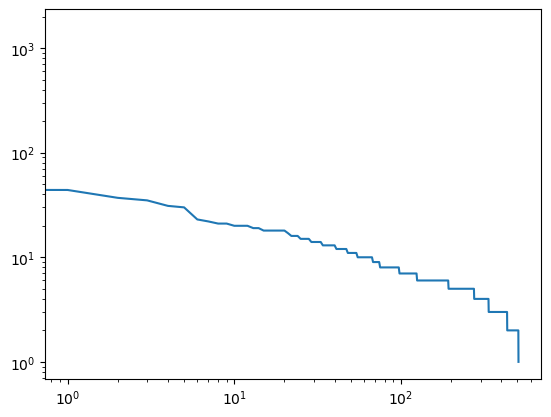

In [12]:
plt.plot(lengths)

plt.yscale("log")
plt.xscale("log")

plt.show()